In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('fifa19.csv')

In [13]:
col = df.columns
striker_data = df[['ST','Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle']]

In [16]:
striker_data.dropna(inplace = True)

/home/frk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
striker_data

,ST,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,88+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,...,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0
1,91+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,...,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0
2,84+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,...,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0
4,82+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,...,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0
5,83+3,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,...,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0


In [19]:
pos = df[['Name','LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']]

In [20]:
pos.head()

,Name,LS,ST,RS,LW,LF,CF,RF,RW,LAM,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,L. Messi,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,...,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2
1,Cristiano Ronaldo,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,Neymar Jr,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,...,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3
3,De Gea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,K. De Bruyne,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,...,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3


In [23]:
def makeNumber(x):
    return int(float(x.split('+')[0]))

In [27]:
striker_data['Striker Rating'] = striker_data['ST'].apply(makeNumber)

/home/frk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
striker_data.drop(['ST'], axis = 1, inplace = True)

/home/frk/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [34]:
X = striker_data.drop('Striker Rating', axis = 1)
y = striker_data['Striker Rating']

In [36]:
lin_reg = LinearRegression()

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [52]:
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
pred = lin_reg.predict(X_test)

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [43]:
print(mean_squared_error(y_test, pred))

0.08108386511680261


In [44]:
print(mean_absolute_error(y_test, pred))

0.24515674619266992


In [53]:
lin_reg.coef_

array([-3.07615812e-04,  1.79815332e-01,  9.98904972e-02,  5.12104507e-02,
        1.96695590e-02,  7.04319403e-02,  3.27138663e-05, -7.51972090e-05,
       -2.85176208e-05,  9.91824950e-02,  4.02920475e-02,  5.03606604e-02,
       -3.81035207e-04,  8.02369297e-02,  2.91017226e-04,  9.99668189e-02,
       -3.21208630e-05, -8.30761543e-05,  5.02739718e-02,  3.03115249e-02,
        2.77379424e-04, -2.08219889e-04,  1.30042263e-01, -5.30871513e-05,
        3.81564688e-04, -2.73146319e-04, -3.99502183e-05,  2.18022636e-04,
       -1.53104060e-04])

In [55]:
coeff = pd.DataFrame(data = lin_reg.coef_, index = X.columns, columns=['Coefficient'])

In [61]:
lin_reg.predict(X.loc[0:1])

array([88.26201624, 91.06501842])

In [64]:
pred = lin_reg.predict(X)

In [65]:
diff = y - pred

/home/frk/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


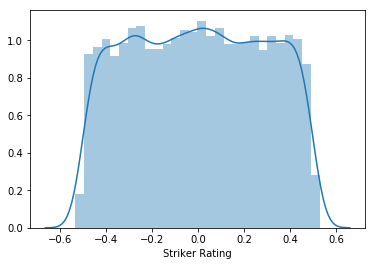

In [67]:
sns.distplot(diff)